In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [4]:
X.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1,0,0,0,0,0


In [5]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance',
         'subsample': .9,
         'learning_rate': 0.3}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04228041462084015
Percent Type II errors: 0.1584833606110202

Test set accuracy:
Percent Type I errors: 0.07975460122699386
Percent Type II errors: 0.18282208588957055


We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees

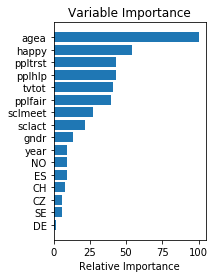

In [6]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
param_grid = [
    {'n_estimators': [500, 600, 700, 800], 'max_depth': [2, 3, 4, 5], 'subsample': [.1, .3, .6, .9], 'learning_rate': [0.3, 0.6, 0.9], 
    'min_samples_leaf': [1, 10]}
]


In [9]:
clf_grid = GridSearchCV(ensemble.GradientBoostingClassifier(), param_grid, verbose=3)

In [10]:
clf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
[CV] learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=500, subsample=0.1 
[CV]  learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=500, subsample=0.1, score=0.685481, total=   2.7s
[CV] learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=500, subsample=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=500, subsample=0.1, score=0.414075, total=   2.5s
[CV] learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=500, subsample=0.1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


[CV]  learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=500, subsample=0.1, score=0.692182, total=   2.4s
[CV] learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.721472, total=   3.6s
[CV] learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.686170, total=   3.5s
[CV] learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.728612, total=   3.6s
[CV] learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=500, subsample=0.6 
[CV]  learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=500, subsample=0.6, score=0.738650, total=   4.5s
[CV] learning_rate=0.3, max_depth=2

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:517: RuntimeWarning: overflow encountered in double_scalars
  tree.value[leaf, 0, 0] = numerator / denominator
C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:490: RuntimeWarning: invalid value encountered in multiply
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))
C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:490: RuntimeWarning: invalid value encountered in subtract
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))


[CV]  learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=700, subsample=0.1, score=0.613339, total=   3.9s
[CV] learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=700, subsample=0.1 
[CV]  learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=700, subsample=0.1, score=0.717560, total=   3.5s
[CV] learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=700, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=700, subsample=0.3, score=0.716155, total=   4.8s
[CV] learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=700, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=700, subsample=0.3, score=0.662439, total=   5.0s
[CV] learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=700, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=2, min_samples_leaf=1, n_estimators=700, subsample=0.3, score=0.729022, total=   4.7s
[CV] learning_rate=0.3, max_depth=2

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:517: RuntimeWarning: overflow encountered in double_scalars
  tree.value[leaf, 0, 0] = numerator / denominator
C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:490: RuntimeWarning: invalid value encountered in multiply
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))
C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:490: RuntimeWarning: invalid value encountered in subtract
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.1, score=0.547054, total=   5.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.1 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.1, score=0.654523, total=   4.6s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.683845, total=   6.0s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.649755, total=   6.0s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.711420, total=   6.5s
[CV] learning_rate=0.3, max_depth=4

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1093: RuntimeWarning: invalid value encountered in double_scalars
  sample_weight[~sample_mask]))


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, n_estimators=800, subsample=0.3, score=0.686451, total=  10.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, n_estimators=800, subsample=0.6 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, n_estimators=800, subsample=0.6, score=0.699387, total=  15.8s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, n_estimators=800, subsample=0.6 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, n_estimators=800, subsample=0.6, score=0.658347, total=  15.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, n_estimators=800, subsample=0.6 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, n_estimators=800, subsample=0.6, score=0.716332, total=  14.7s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, n_estimators=800, subsample=0.9 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, n_estimators=800, subsample=0.9, score=0.685890, total=  14.9s
[CV] learning_rate=0.3, max_depth=4

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:517: RuntimeWarning: overflow encountered in double_scalars
  tree.value[leaf, 0, 0] = numerator / denominator
C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:490: RuntimeWarning: invalid value encountered in multiply
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, n_estimators=700, subsample=0.1, score=0.576514, total=   6.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, n_estimators=700, subsample=0.1 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, n_estimators=700, subsample=0.1, score=0.548097, total=   6.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, n_estimators=700, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, n_estimators=700, subsample=0.3, score=0.688753, total=   9.4s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, n_estimators=700, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, n_estimators=700, subsample=0.3, score=0.654255, total=   9.0s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, n_estimators=700, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, n_estimators=700, subsample=0.3, score=0.715923, total=   9.3s
[CV] learning_rate=0.3, ma

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1093: RuntimeWarning: invalid value encountered in double_scalars
  sample_weight[~sample_mask]))


[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, n_estimators=800, subsample=0.1, score=0.503070, total=   7.8s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, n_estimators=800, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, n_estimators=800, subsample=0.3, score=0.671166, total=  11.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, n_estimators=800, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, n_estimators=800, subsample=0.3, score=0.645663, total=  10.0s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, n_estimators=800, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, n_estimators=800, subsample=0.3, score=0.692591, total=  10.0s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=10, n_estimators=800, subsample=0.6 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=10, n_estimators=800, subsample=0.6, score=0.699796, total=  13.3s
[CV] learning_rate=0.3, ma

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1093: RuntimeWarning: invalid value encountered in double_scalars
  sample_weight[~sample_mask]))


[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, n_estimators=800, subsample=0.1, score=0.407529, total=  10.3s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, n_estimators=800, subsample=0.1 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, n_estimators=800, subsample=0.1, score=0.467458, total=  10.4s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, n_estimators=800, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, n_estimators=800, subsample=0.3, score=0.679346, total=  15.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, n_estimators=800, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, n_estimators=800, subsample=0.3, score=0.657119, total=  16.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=10, n_estimators=800, subsample=0.3 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=10, n_estimators=800, subsample=0.3, score=0.710192, total=  15.6s
[CV] learning_rate=0.3, ma

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1093: RuntimeWarning: invalid value encountered in double_scalars
  sample_weight[~sample_mask]))


[CV]  learning_rate=0.6, max_depth=3, min_samples_leaf=1, n_estimators=500, subsample=0.1, score=0.604746, total=   4.3s
[CV] learning_rate=0.6, max_depth=3, min_samples_leaf=1, n_estimators=500, subsample=0.1 
[CV]  learning_rate=0.6, max_depth=3, min_samples_leaf=1, n_estimators=500, subsample=0.1, score=0.442079, total=   4.2s
[CV] learning_rate=0.6, max_depth=3, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.6, max_depth=3, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.689571, total=   5.2s
[CV] learning_rate=0.6, max_depth=3, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.6, max_depth=3, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.656301, total=   5.2s
[CV] learning_rate=0.6, max_depth=3, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.6, max_depth=3, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.708555, total=   5.1s
[CV] learning_rate=0.6, max_depth=3

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1093: RuntimeWarning: invalid value encountered in double_scalars
  sample_weight[~sample_mask]))


[CV]  learning_rate=0.6, max_depth=3, min_samples_leaf=1, n_estimators=700, subsample=0.3, score=0.693410, total=   7.0s
[CV] learning_rate=0.6, max_depth=3, min_samples_leaf=1, n_estimators=700, subsample=0.6 
[CV]  learning_rate=0.6, max_depth=3, min_samples_leaf=1, n_estimators=700, subsample=0.6, score=0.682618, total=   9.3s
[CV] learning_rate=0.6, max_depth=3, min_samples_leaf=1, n_estimators=700, subsample=0.6 
[CV]  learning_rate=0.6, max_depth=3, min_samples_leaf=1, n_estimators=700, subsample=0.6, score=0.644026, total=   9.1s
[CV] learning_rate=0.6, max_depth=3, min_samples_leaf=1, n_estimators=700, subsample=0.6 
[CV]  learning_rate=0.6, max_depth=3, min_samples_leaf=1, n_estimators=700, subsample=0.6, score=0.697094, total=   9.2s
[CV] learning_rate=0.6, max_depth=3, min_samples_leaf=1, n_estimators=700, subsample=0.9 
[CV]  learning_rate=0.6, max_depth=3, min_samples_leaf=1, n_estimators=700, subsample=0.9, score=0.689571, total=   9.5s
[CV] learning_rate=0.6, max_depth=3

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:517: RuntimeWarning: overflow encountered in double_scalars
  tree.value[leaf, 0, 0] = numerator / denominator
C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:490: RuntimeWarning: invalid value encountered in multiply
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))
C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:490: RuntimeWarning: invalid value encountered in subtract
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))


[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.1, score=0.575696, total=   5.5s
[CV] learning_rate=0.6, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.1 
[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.1, score=0.564879, total=   5.7s
[CV] learning_rate=0.6, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.647853, total=   7.2s
[CV] learning_rate=0.6, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.605565, total=   7.4s
[CV] learning_rate=0.6, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.641424, total=   7.0s
[CV] learning_rate=0.6, max_depth=4

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1093: RuntimeWarning: invalid value encountered in double_scalars
  sample_weight[~sample_mask]))


[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=1, n_estimators=600, subsample=0.6, score=0.689980, total=  10.6s
[CV] learning_rate=0.6, max_depth=4, min_samples_leaf=1, n_estimators=600, subsample=0.6 
[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=1, n_estimators=600, subsample=0.6, score=0.632160, total=  10.4s
[CV] learning_rate=0.6, max_depth=4, min_samples_leaf=1, n_estimators=600, subsample=0.6 
[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=1, n_estimators=600, subsample=0.6, score=0.688498, total=  10.4s
[CV] learning_rate=0.6, max_depth=4, min_samples_leaf=1, n_estimators=600, subsample=0.9 
[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=1, n_estimators=600, subsample=0.9, score=0.684663, total=  12.6s
[CV] learning_rate=0.6, max_depth=4, min_samples_leaf=1, n_estimators=600, subsample=0.9 
[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=1, n_estimators=600, subsample=0.9, score=0.647300, total=  12.0s
[CV] learning_rate=0.6, max_depth=4

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:517: RuntimeWarning: overflow encountered in double_scalars
  tree.value[leaf, 0, 0] = numerator / denominator
C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:490: RuntimeWarning: invalid value encountered in multiply
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))
C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:490: RuntimeWarning: invalid value encountered in subtract
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))


[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=10, n_estimators=600, subsample=0.1, score=0.432720, total=   7.1s
[CV] learning_rate=0.6, max_depth=4, min_samples_leaf=10, n_estimators=600, subsample=0.1 
[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=10, n_estimators=600, subsample=0.1, score=0.425532, total=   7.5s
[CV] learning_rate=0.6, max_depth=4, min_samples_leaf=10, n_estimators=600, subsample=0.1 
[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=10, n_estimators=600, subsample=0.1, score=0.590667, total=   6.7s
[CV] learning_rate=0.6, max_depth=4, min_samples_leaf=10, n_estimators=600, subsample=0.3 
[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=10, n_estimators=600, subsample=0.3, score=0.596319, total=   9.5s
[CV] learning_rate=0.6, max_depth=4, min_samples_leaf=10, n_estimators=600, subsample=0.3 
[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=10, n_estimators=600, subsample=0.3, score=0.483224, total=   8.9s
[CV] learning_rate=0.6, ma

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:517: RuntimeWarning: overflow encountered in double_scalars
  tree.value[leaf, 0, 0] = numerator / denominator
C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:490: RuntimeWarning: invalid value encountered in multiply
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))
C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:490: RuntimeWarning: invalid value encountered in subtract
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))


[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=10, n_estimators=800, subsample=0.3, score=0.611134, total=  12.2s
[CV] learning_rate=0.6, max_depth=4, min_samples_leaf=10, n_estimators=800, subsample=0.6 
[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=10, n_estimators=800, subsample=0.6, score=0.672393, total=  16.7s
[CV] learning_rate=0.6, max_depth=4, min_samples_leaf=10, n_estimators=800, subsample=0.6 
[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=10, n_estimators=800, subsample=0.6, score=0.651391, total=  16.9s
[CV] learning_rate=0.6, max_depth=4, min_samples_leaf=10, n_estimators=800, subsample=0.6 
[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=10, n_estimators=800, subsample=0.6, score=0.685223, total=  16.1s
[CV] learning_rate=0.6, max_depth=4, min_samples_leaf=10, n_estimators=800, subsample=0.9 
[CV]  learning_rate=0.6, max_depth=4, min_samples_leaf=10, n_estimators=800, subsample=0.9, score=0.685481, total=  17.6s
[CV] learning_rate=0.6, ma

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1093: RuntimeWarning: invalid value encountered in double_scalars
  sample_weight[~sample_mask]))


[CV]  learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=600, subsample=0.1, score=0.670348, total=   8.1s
[CV] learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=600, subsample=0.1 
[CV]  learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=600, subsample=0.1, score=0.560556, total=   8.3s
[CV] learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=600, subsample=0.1 
[CV]  learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=600, subsample=0.1, score=0.446991, total=   7.8s
[CV] learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=600, subsample=0.3 
[CV]  learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=600, subsample=0.3, score=0.578323, total=  10.7s
[CV] learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=600, subsample=0.3 
[CV]  learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=600, subsample=0.3, score=0.554010, total=  10.4s
[CV] learning_rate=0.6, max_depth=5

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1093: RuntimeWarning: invalid value encountered in double_scalars
  sample_weight[~sample_mask]))


[CV]  learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=800, subsample=0.1, score=0.501227, total=  11.0s
[CV] learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=800, subsample=0.1 
[CV]  learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=800, subsample=0.1, score=0.648383, total=  10.9s
[CV] learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=800, subsample=0.3 


C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1093: RuntimeWarning: invalid value encountered in double_scalars
  sample_weight[~sample_mask]))


[CV]  learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=800, subsample=0.3, score=0.398773, total=  15.6s
[CV] learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=800, subsample=0.3 
[CV]  learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=800, subsample=0.3, score=0.565466, total=  14.8s
[CV] learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=800, subsample=0.3 
[CV]  learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=800, subsample=0.3, score=0.642243, total=  15.9s
[CV] learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=800, subsample=0.6 
[CV]  learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=800, subsample=0.6, score=0.662986, total=  15.6s
[CV] learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=800, subsample=0.6 
[CV]  learning_rate=0.6, max_depth=5, min_samples_leaf=1, n_estimators=800, subsample=0.6, score=0.632160, total=  16.2s
[CV] learning_rate=0.6, max_depth=5

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:517: RuntimeWarning: overflow encountered in double_scalars
  tree.value[leaf, 0, 0] = numerator / denominator
C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:490: RuntimeWarning: invalid value encountered in multiply
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))


[CV]  learning_rate=0.6, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.543149, total=   9.2s
[CV] learning_rate=0.6, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.6, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.502046, total=   8.6s
[CV] learning_rate=0.6, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.6, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.667212, total=   8.2s
[CV] learning_rate=0.6, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.6 
[CV]  learning_rate=0.6, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.6, score=0.696524, total=  13.2s
[CV] learning_rate=0.6, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.6 
[CV]  learning_rate=0.6, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.6, score=0.643617, total=  13.4s
[CV] learning_rate=0.6, ma

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1093: RuntimeWarning: invalid value encountered in double_scalars
  sample_weight[~sample_mask]))


[CV]  learning_rate=0.9, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.642243, total=   6.4s
[CV] learning_rate=0.9, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.6 
[CV]  learning_rate=0.9, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.6, score=0.648262, total=   5.3s
[CV] learning_rate=0.9, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.6 
[CV]  learning_rate=0.9, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.6, score=0.558101, total=   6.5s
[CV] learning_rate=0.9, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.6 
[CV]  learning_rate=0.9, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.6, score=0.704462, total=   5.4s
[CV] learning_rate=0.9, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.9, max_depth=4, min_samples_leaf=1, n_estimators=500, subsample=0.9, score=0.676892, total=   6.9s
[CV] learning_rate=0.9, max_depth=4

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1093: RuntimeWarning: invalid value encountered in double_scalars
  sample_weight[~sample_mask]))


[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.448036, total=   3.0s
[CV] learning_rate=0.9, max_depth=5, min_samples_leaf=1, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=1, n_estimators=500, subsample=0.3, score=0.445763, total=   3.2s
[CV] learning_rate=0.9, max_depth=5, min_samples_leaf=1, n_estimators=500, subsample=0.6 
[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=1, n_estimators=500, subsample=0.6, score=0.635992, total=   3.3s
[CV] learning_rate=0.9, max_depth=5, min_samples_leaf=1, n_estimators=500, subsample=0.6 
[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=1, n_estimators=500, subsample=0.6, score=0.626841, total=   3.4s
[CV] learning_rate=0.9, max_depth=5, min_samples_leaf=1, n_estimators=500, subsample=0.6 
[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=1, n_estimators=500, subsample=0.6, score=0.661482, total=   3.5s
[CV] learning_rate=0.9, max_depth=5

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:517: RuntimeWarning: overflow encountered in double_scalars
  tree.value[leaf, 0, 0] = numerator / denominator
C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:490: RuntimeWarning: invalid value encountered in multiply
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))
C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:490: RuntimeWarning: invalid value encountered in subtract
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))


[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.614724, total=   2.8s
[CV] learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.3 


C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:517: RuntimeWarning: overflow encountered in double_scalars
  tree.value[leaf, 0, 0] = numerator / denominator
C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:490: RuntimeWarning: invalid value encountered in multiply
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))
C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:490: RuntimeWarning: invalid value encountered in subtract
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))


[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.418985, total=   2.9s
[CV] learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.3 
[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.3, score=0.425297, total=   2.6s
[CV] learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.6 
[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.6, score=0.634356, total=   3.7s
[CV] learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.6 
[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.6, score=0.655483, total=   3.8s
[CV] learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.6 
[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=500, subsample=0.6, score=0.701596, total=   3.7s
[CV] learning_rate=0.9, ma

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1093: RuntimeWarning: invalid value encountered in double_scalars
  sample_weight[~sample_mask]))


[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=600, subsample=0.1, score=0.442536, total=   2.4s
[CV] learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=600, subsample=0.1 
[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=600, subsample=0.1, score=0.646890, total=   2.4s
[CV] learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=600, subsample=0.1 
[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=600, subsample=0.1, score=0.536226, total=   2.4s
[CV] learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=600, subsample=0.3 
[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=600, subsample=0.3, score=0.485072, total=   3.6s
[CV] learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=600, subsample=0.3 


C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:517: RuntimeWarning: overflow encountered in double_scalars
  tree.value[leaf, 0, 0] = numerator / denominator
C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:490: RuntimeWarning: invalid value encountered in multiply
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))
C:\Users\johna\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:490: RuntimeWarning: invalid value encountered in subtract
  np.sum(sample_weight * ((y * pred) - np.logaddexp(0.0, pred))))


[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=600, subsample=0.3, score=0.489771, total=   3.8s
[CV] learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=600, subsample=0.3 
[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=600, subsample=0.3, score=0.568563, total=   3.6s
[CV] learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=600, subsample=0.6 
[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=600, subsample=0.6, score=0.632311, total=   4.1s
[CV] learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=600, subsample=0.6 
[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=600, subsample=0.6, score=0.663257, total=   4.6s
[CV] learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=600, subsample=0.6 
[CV]  learning_rate=0.9, max_depth=5, min_samples_leaf=10, n_estimators=600, subsample=0.6, score=0.699550, total=   4.5s
[CV] learning_rate=0.9, ma

[Parallel(n_jobs=1)]: Done 1152 out of 1152 | elapsed: 152.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [500, 600, 700, 800], 'max_depth': [2, 3, 4, 5], 'subsample': [0.1, 0.3, 0.6, 0.9], 'learning_rate': [0.3, 0.6, 0.9], 'min_samples_leaf': [1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [65]:
clf_grid.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=0.9, verbose=0, warm_start=False)